<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/Simulation_1403_07_15_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#!pip install fitter

In [1]:
import pandas as pd
from sklearn.metrics import r2_score
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
# from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
root_path = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation'

In [4]:
total_file_link = []
for i in os.listdir(root_path) :
  total_file_link.append(root_path+f'/{i}')

In [5]:
pd.read_csv(total_file_link[2])

,r/R,mean_delta_x,std_delta_x,mean_delta_y,std_delta_y,mean_delta_z,std_delta_z
0,0.2001,0.0434,0.0026,-0.0126,0.0013,-0.0162,0.0040
1,0.2499,-0.0157,0.0019,-0.0235,0.0031,-0.0061,0.0079
2,0.2998,-0.0418,0.0016,-0.0514,0.0053,-0.0781,0.0130
3,0.3498,-0.0550,0.0016,-0.0961,0.0091,-0.1268,0.0216
4,0.3913,-0.0646,0.0024,-0.1332,0.0133,-0.1839,0.0303
5,0.4496,-0.1020,0.0026,-0.1704,0.0173,-0.3251,0.0405
6,0.4997,-0.1255,0.0030,-0.2004,0.0207,-0.4803,0.0503
7,0.5387,-0.1535,0.0028,-0.2193,0.0230,-0.6758,0.0569
8,0.5996,-0.1964,0.0031,-0.2466,0.0273,-0.9893,0.0678
9,0.6498,-0.2235,0.0031,-0.2726,0.0316,-1.3829,0.0783


In [6]:
total_alpha_content = [ i / 1000 for i in range( 1 , 10 )  ]
total_flat_content  = [ i for i in range(1 , 5  ) ]
total_location      = list(range( 5 , 16))

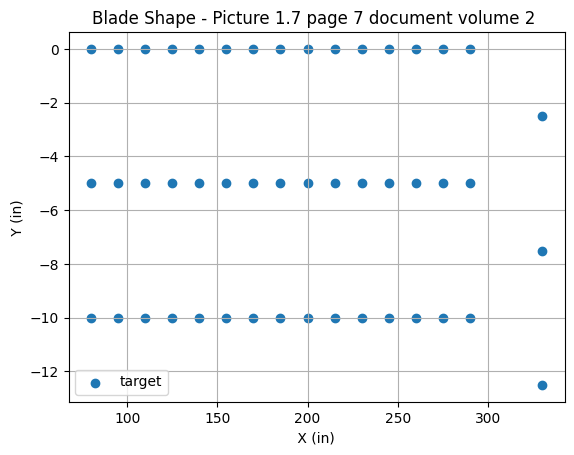

In [7]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [8]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,

    'accuracy_random_forest' : [] ,
    'n_estimators_RF' : [] ,
    'max_features_RF' : [] ,
    'max_depth_RF'    : [] ,
    'criterion_RF'    : [] ,

    'accuracy_extra_classifier' : [] ,
    'accuracy_svc_' : [] ,
    'C_svc'         : [] ,
    'kernel_svc'    : [] ,
    'gamma_svc'     : [] ,
    'ann'           : []


}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


iter_alpha : 0.001 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.976523382388302
r2_score in Simulation Failt  void  for Each Blade :  0.9659866186653335
Error in Simulation Fault for Each Blade :  -0.7775454918724691  --- r2_score Fault S ----  0.9669621391220792
Error in Simulation Fault T  for Each Blade :  -0.7775454918724691  --- r2_score Fault T :  0.9734747988690802
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9710372871306827
r2_score in Simulation Failt  void  for Each Blade :  0.9787307291418295
Error in Simulation Fault for Each Blade :  0.3755082545936137  --- r2_score Fault S ----  0.9559139175400034
Error in Simulation Fault T  for Each Blade :  0.3755082545936137  --- r2_score Fault T :  0.9782062588590686
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9659548913704232
r2_score in Simulation Failt  void  for Each Blade :  0.9855545590347717
Error in Simulation Fault

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.20754716981132076
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.1477 - loss: 1.4871 - val_acc: 0.2264 - val_loss: 1.3838
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.1958 - loss: 1.4503 - val_acc: 0.2453 - val_loss: 1.3811
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2731 - loss: 1.4054 - val_acc: 0.2453 - val_loss: 1.3799
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.1953 - loss: 1.4479 - val_acc: 0.2642 - val_loss: 1.3799
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2471 - loss: 1.3920 - val_acc: 0.2453 - val_loss: 1.3803
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2410 - loss: 1.4183 - val_acc: 0.2264 - val_loss: 1.3813
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2508 - loss: 1.3981 - val_acc: 0.2453 - val_loss: 1.3824
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2294 - loss: 1.3988 - val_acc: 0.2264 - val_loss: 1.3844
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.1940 - loss: 1.4088 - val_a

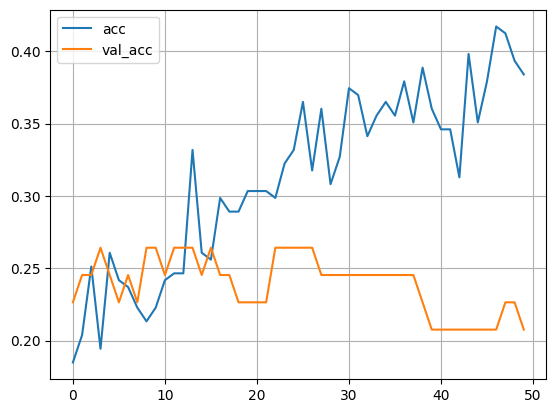

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2113 - loss: 1.4367 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9857212554236768
r2_score in Simulation Failt  void  for Each Blade :  0.9759954138815023
Error in Simulation Fault for Each Blade :  -0.2587998414885133  --- r2_score Fault S ----  0.9796418478021676
Error in Simulation Fault T  for Each Blade :  -0.2587998414885133  --- r2_score Fault T :  0.9574874579333528
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9759060111240568
r2_score in Simulation Failt  void  for Each Blade :  0.9841279892147619
Error in Simulation Fault for Each Blade :  0.17860569900842638  --- r2_score Fault S ----  0.977192392445427
Error in Simulation Fault T  for Each Blade :  0.17860569900842638  --- r2_score Fault T :  0.9717270016393086
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.2641509433962264
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - acc: 0.2343 - loss: 1.4556 - val_acc: 0.1887 - val_loss: 1.5314
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2249 - loss: 1.4489 - val_acc: 0.1887 - val_loss: 1.5174
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2273 - loss: 1.4411 - val_acc: 0.1698 - val_loss: 1.5059
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2600 - loss: 1.4523 - val_acc: 0.1509 - val_loss: 1.4958
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2886 - loss: 1.4039 - val_acc: 0.1698 - val_loss: 1.4895
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2445 - loss: 1.4316 - val_acc: 0.1132 - val_loss: 1.4847
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2516 - loss: 1.3922 - val_acc: 0.1132 - val_loss: 1.4790
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2797 - loss: 1.3752 - val_acc: 0.0943 - val_loss: 1.4753
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3243 - loss: 1.3742 - val_acc: 0.1132

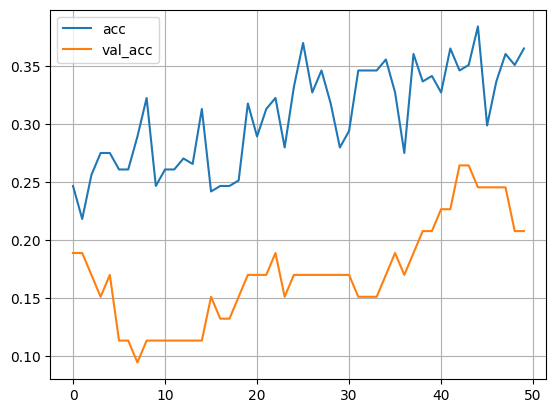

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2113 - loss: 1.4819
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9772743109752501
r2_score in Simulation Failt  void  for Each Blade :  0.9713831287102588
Error in Simulation Fault for Each Blade :  -0.023581998793829273  --- r2_score Fault S ----  0.9850609534660228
Error in Simulation Fault T  for Each Blade :  -0.023581998793829273  --- r2_score Fault T :  0.9781132577550155
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9927503318799114
r2_score in Simulation Failt  void  for Each Blade :  0.988145822751797
Error in Simulation Fault for Each Blade :  4.115387972258482  --- r2_score Fault S ----  0.9231325030098265
Error in Simulation Fault T  for Each Blade :  4.115387972258482  --- r2_score Fault T :  0.9805350471226498
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.22641509433962265
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - acc: 0.2161 - loss: 1.4430 - val_acc: 0.2075 - val_loss: 1.4274
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2416 - loss: 1.4479 - val_acc: 0.2453 - val_loss: 1.4190
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.2513 - loss: 1.4159 - val_acc: 0.2453 - val_loss: 1.4137
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2504 - loss: 1.4265 - val_acc: 0.2453 - val_loss: 1.4094
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2513 - loss: 1.4250 - val_acc: 0.2264 - val_loss: 1.4068
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.2227 - loss: 1.4263 - val_acc: 0.2453 - val_loss: 1.4056
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2203 - loss: 1.4038 - val_acc: 0.2075 - val_loss: 1.4045
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.2235 - loss: 1.4042 - val_acc: 0.2075 - val_loss: 1.4038
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2305 - loss: 1.3918 - val_acc: 0.

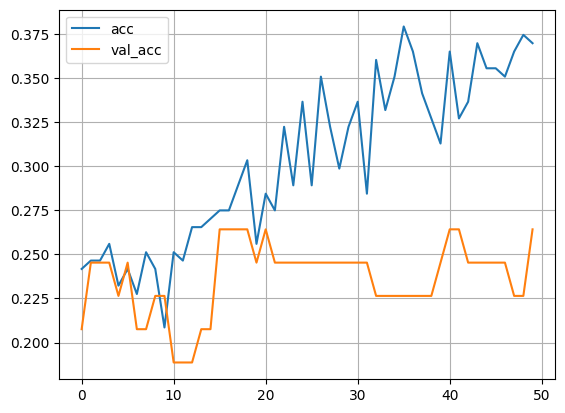

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2594 - loss: 1.4322 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9662935580983898
r2_score in Simulation Failt  void  for Each Blade :  0.9892012788150256
Error in Simulation Fault for Each Blade :  0.18879807723016118  --- r2_score Fault S ----  0.9724058227023163
Error in Simulation Fault T  for Each Blade :  0.18879807723016118  --- r2_score Fault T :  0.977247339061151
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9805490544668679
r2_score in Simulation Failt  void  for Each Blade :  0.9808593967591454
Error in Simulation Fault for Each Blade :  -2.082240570736766  --- r2_score Fault S ----  0.9789016906564943
Error in Simulation Fault T  for Each Blade :  -2.082240570736766  --- r2_score Fault T :  0.9740788658008919
 ----- for each Blade Simulated ----- 
r2_sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.20754716981132076
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - acc: 0.2547 - loss: 1.4700 - val_acc: 0.1887 - val_loss: 1.5120
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2640 - loss: 1.4458 - val_acc: 0.1887 - val_loss: 1.5007
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2971 - loss: 1.4089 - val_acc: 0.2075 - val_loss: 1.4921
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2937 - loss: 1.3943 - val_acc: 0.1887 - val_loss: 1.4851
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2340 - loss: 1.4128 - val_acc: 0.2075 - val_loss: 1.4787
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2819 - loss: 1.4052 - val_acc: 0.2264 - val_loss: 1.4714
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2771 - loss: 1.3825 - val_acc: 0.2453 - val_loss: 1.4675
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2717 - loss: 1.3913 - val_acc: 0.2453 - val_loss: 1.4644
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2701 - loss: 1.3781 - val_acc: 0.2453 -

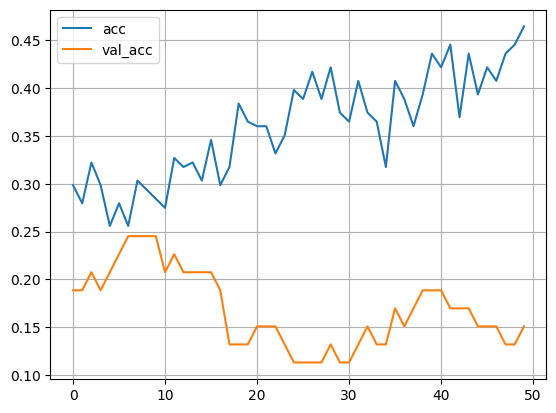

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.1527 - loss: 1.4624
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9914828143064639
r2_score in Simulation Failt  void  for Each Blade :  0.9790408924490116
Error in Simulation Fault for Each Blade :  -1.637047183927815  --- r2_score Fault S ----  0.9759308604882067
Error in Simulation Fault T  for Each Blade :  -1.637047183927815  --- r2_score Fault T :  0.9911346800753369
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9895523555179285
r2_score in Simulation Failt  void  for Each Blade :  0.9823577026650993
Error in Simulation Fault for Each Blade :  1.0102745609606232  --- r2_score Fault S ----  0.9599121924696365
Error in Simulation Fault T  for Each Blade :  1.0102745609606232  --- r2_score Fault T :  0.9875369598567466
 ----- for each Blade Simulated ----- 
r2_sco

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3584905660377358
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - acc: 0.2086 - loss: 1.5375 - val_acc: 0.2453 - val_loss: 1.4392
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2477 - loss: 1.4066 - val_acc: 0.1887 - val_loss: 1.4321
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3665 - loss: 1.3966 - val_acc: 0.1698 - val_loss: 1.4270
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3215 - loss: 1.4037 - val_acc: 0.2075 - val_loss: 1.4219
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2678 - loss: 1.4189 - val_acc: 0.2075 - val_loss: 1.4178
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.1994 - loss: 1.4616 - val_acc: 0.1887 - val_loss: 1.4138
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3115 - loss: 1.3563 - val_acc: 0.1887 - val_loss: 1.4122
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2609 - loss: 1.4218 - val_acc: 0.2264 - val_loss: 1.4098
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3288 - loss: 1.3824 - val_acc: 0.226

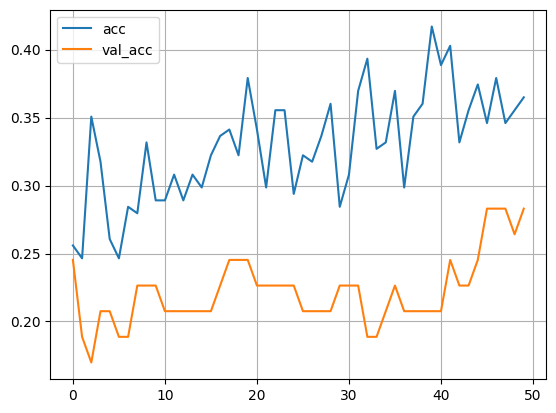

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2928 - loss: 1.3929 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9705566620425543
r2_score in Simulation Failt  void  for Each Blade :  0.9857842219721349
Error in Simulation Fault for Each Blade :  -3.145815109490833  --- r2_score Fault S ----  0.9579737526546376
Error in Simulation Fault T  for Each Blade :  -3.145815109490833  --- r2_score Fault T :  0.9803583346964997
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9680810519908964
r2_score in Simulation Failt  void  for Each Blade :  0.9832076161219359
Error in Simulation Fault for Each Blade :  -2.1725653895719463  --- r2_score Fault S ----  0.9800904603643688
Error in Simulation Fault T  for Each Blade :  -2.1725653895719463  --- r2_score Fault T :  0.9729576553376665
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.16981132075471697
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.3014 - loss: 1.3778 - val_acc: 0.2453 - val_loss: 1.4384
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2560 - loss: 1.3866 - val_acc: 0.2453 - val_loss: 1.4321
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2898 - loss: 1.3701 - val_acc: 0.2642 - val_loss: 1.4289
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2627 - loss: 1.4027 - val_acc: 0.2830 - val_loss: 1.4268
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2985 - loss: 1.3603 - val_acc: 0.2830 - val_loss: 1.4239
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3441 - loss: 1.3594 - val_acc: 0.2642 - val_loss: 1.4214
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3005 - loss: 1.3626 - val_acc: 0.2642 - val_loss: 1.4216
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3041 - loss: 1.3569 - val_acc: 0.2264 - val_loss: 1.4220
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2995 - loss: 1.3805 - val_acc: 0.245

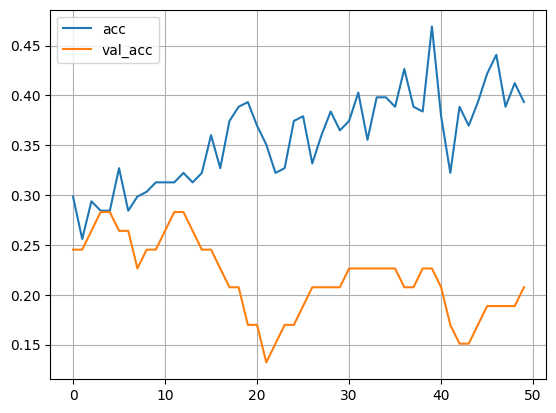

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2217 - loss: 1.4448
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9070758770945063
r2_score in Simulation Failt  void  for Each Blade :  0.9788340477346034
Error in Simulation Fault for Each Blade :  -0.1757965855325596  --- r2_score Fault S ----  0.9693161050386223
Error in Simulation Fault T  for Each Blade :  -0.1757965855325596  --- r2_score Fault T :  0.9553935709431602
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9581782662085596
r2_score in Simulation Failt  void  for Each Blade :  0.977650448973175
Error in Simulation Fault for Each Blade :  3.0771845861480256  --- r2_score Fault S ----  0.9534343564114867
Error in Simulation Fault T  for Each Blade :  3.0771845861480256  --- r2_score Fault T :  0.9765815172260212
 ----- for each Blade Simulated ----- 
r2_sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.2641509433962264
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - acc: 0.2164 - loss: 1.5137 - val_acc: 0.2453 - val_loss: 1.4882
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2447 - loss: 1.4749 - val_acc: 0.2453 - val_loss: 1.4653
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2482 - loss: 1.4785 - val_acc: 0.2642 - val_loss: 1.4491
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2435 - loss: 1.4849 - val_acc: 0.2830 - val_loss: 1.4387
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2681 - loss: 1.4290 - val_acc: 0.2830 - val_loss: 1.4308
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2548 - loss: 1.4000 - val_acc: 0.2830 - val_loss: 1.4256
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.3191 - loss: 1.4203 - val_acc: 0.2830 - val_loss: 1.4220
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2202 - loss: 1.4202 - val_acc: 0.2453 - val_loss: 1.4186
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2789 - loss: 1.3935 - val_acc: 0.2453 

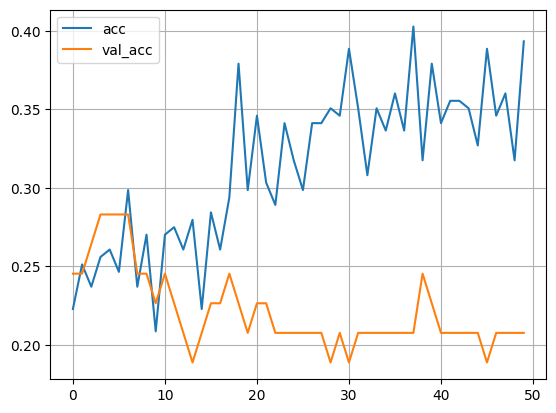

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2321 - loss: 1.4104 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9900214565866112
r2_score in Simulation Failt  void  for Each Blade :  0.9866400139132501
Error in Simulation Fault for Each Blade :  0.6917319301285669  --- r2_score Fault S ----  0.9694109051863958
Error in Simulation Fault T  for Each Blade :  0.6917319301285669  --- r2_score Fault T :  0.981839035177749
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9780541290573894
r2_score in Simulation Failt  void  for Each Blade :  0.989546581478229
Error in Simulation Fault for Each Blade :  0.13186591815119342  --- r2_score Fault S ----  0.9962788634064633
Error in Simulation Fault T  for Each Blade :  0.13186591815119342  --- r2_score Fault T :  0.9871391495224898
 ----- for each Blade Simulated ----- 
r2_sco

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.22641509433962265
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - acc: 0.2348 - loss: 1.4514 - val_acc: 0.3208 - val_loss: 1.3833
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2253 - loss: 1.4071 - val_acc: 0.2830 - val_loss: 1.3780
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2234 - loss: 1.3899 - val_acc: 0.2830 - val_loss: 1.3722
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.1845 - loss: 1.4091 - val_acc: 0.3019 - val_loss: 1.3668
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2164 - loss: 1.4280 - val_acc: 0.3019 - val_loss: 1.3639
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2278 - loss: 1.3817 - val_acc: 0.2830 - val_loss: 1.3620
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2621 - loss: 1.3985 - val_acc: 0.2830 - val_loss: 1.3612
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2117 - loss: 1.3788 - val_acc: 0.2830 - val_loss: 1.3609
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2937 - loss: 1.3935 - val_acc: 0.3019

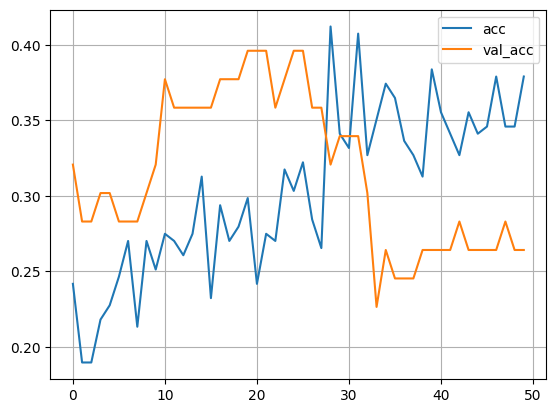

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2490 - loss: 1.3697 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9796718702374833
r2_score in Simulation Failt  void  for Each Blade :  0.977018647507169
Error in Simulation Fault for Each Blade :  -2.093643414087408  --- r2_score Fault S ----  0.9688775151133799
Error in Simulation Fault T  for Each Blade :  -2.093643414087408  --- r2_score Fault T :  0.9805742626740348
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.989063564896962
r2_score in Simulation Failt  void  for Each Blade :  0.9733417215796204
Error in Simulation Fault for Each Blade :  1.877917476224011  --- r2_score Fault S ----  0.9822384817898228
Error in Simulation Fault T  for Each Blade :  1.877917476224011  --- r2_score Fault T :  0.9868927639469569
 ----- for each Blade Simulated ----- 
r2_score i

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.20754716981132076
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - acc: 0.2427 - loss: 1.4469 - val_acc: 0.2075 - val_loss: 1.3941
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.2660 - loss: 1.4173 - val_acc: 0.2264 - val_loss: 1.3940
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.2914 - loss: 1.3827 - val_acc: 0.2264 - val_loss: 1.3945
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2426 - loss: 1.4024 - val_acc: 0.2453 - val_loss: 1.3953
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2832 - loss: 1.3602 - val_acc: 0.2264 - val_loss: 1.3992
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.2733 - loss: 1.3879 - val_acc: 0.2453 - val_loss: 1.4027
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3245 - loss: 1.3506 - val_acc: 0.2453 - val_loss: 1.4049
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3243 - loss: 1.3470 - val_acc: 0.1887 - val_loss: 1.4060
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.2899 - loss: 1.3644 - val_acc: 0.

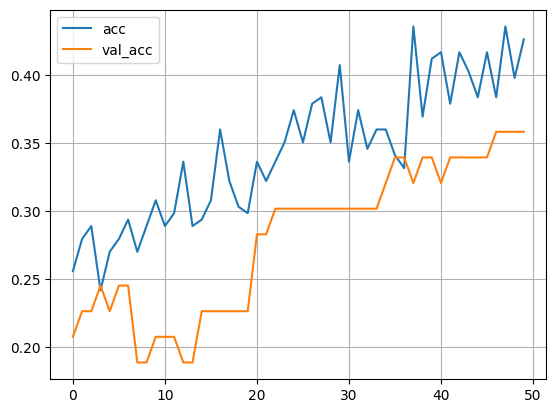

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3640 - loss: 1.3996 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9781945346119454
r2_score in Simulation Failt  void  for Each Blade :  0.9669461978004855
Error in Simulation Fault for Each Blade :  -1.5231927186076795  --- r2_score Fault S ----  0.9758056957247315
Error in Simulation Fault T  for Each Blade :  -1.5231927186076795  --- r2_score Fault T :  0.9759166760816937
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9639353582421465
r2_score in Simulation Failt  void  for Each Blade :  0.9760541741824269
Error in Simulation Fault for Each Blade :  -0.14855813708756438  --- r2_score Fault S ----  0.9935188312757205
Error in Simulation Fault T  for Each Blade :  -0.14855813708756438  --- r2_score Fault T :  0.983143979191811
 ----- for each Blade Simulated ----- 
r

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.22641509433962265
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.2574 - loss: 1.5163 - val_acc: 0.2642 - val_loss: 1.5380
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2675 - loss: 1.5636 - val_acc: 0.2453 - val_loss: 1.5142
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3159 - loss: 1.4637 - val_acc: 0.2642 - val_loss: 1.4965
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2215 - loss: 1.4868 - val_acc: 0.2642 - val_loss: 1.4835
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2586 - loss: 1.4018 - val_acc: 0.2264 - val_loss: 1.4744
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.2803 - loss: 1.4080 - val_acc: 0.1887 - val_loss: 1.4672
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2676 - loss: 1.4371 - val_acc: 0.1698 - val_loss: 1.4608
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.2017 - loss: 1.4390 - val_acc: 0.1698 - val_loss: 1.4535
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.3017 - loss: 1.3915 - val_acc: 0.

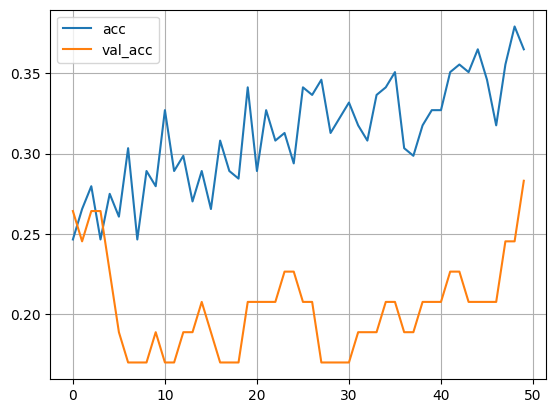

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2720 - loss: 1.4131 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9847221961377208
r2_score in Simulation Failt  void  for Each Blade :  0.9909215153030462
Error in Simulation Fault for Each Blade :  1.920218198115757  --- r2_score Fault S ----  0.9461191060946839
Error in Simulation Fault T  for Each Blade :  1.920218198115757  --- r2_score Fault T :  0.9728453671648942
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9793405715103705
r2_score in Simulation Failt  void  for Each Blade :  0.9687123744458992
Error in Simulation Fault for Each Blade :  -2.7324716494126804  --- r2_score Fault S ----  0.9654446759038785
Error in Simulation Fault T  for Each Blade :  -2.7324716494126804  --- r2_score Fault T :  0.9682039664847646
 ----- for each Blade Simulated ----- 
r2_sco

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.16981132075471697
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.1955 - loss: 1.5565 - val_acc: 0.2642 - val_loss: 1.4094
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2571 - loss: 1.5143 - val_acc: 0.2642 - val_loss: 1.3994
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2746 - loss: 1.4475 - val_acc: 0.2642 - val_loss: 1.3940
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2380 - loss: 1.4265 - val_acc: 0.2830 - val_loss: 1.3899
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2760 - loss: 1.4207 - val_acc: 0.3019 - val_loss: 1.3889
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2796 - loss: 1.4131 - val_acc: 0.3396 - val_loss: 1.3892
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2809 - loss: 1.4088 - val_acc: 0.3208 - val_loss: 1.3915
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2496 - loss: 1.4214 - val_acc: 0.3585 - val_loss: 1.3939
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3106 - loss: 1.3697 - val_acc: 0.3208 - 

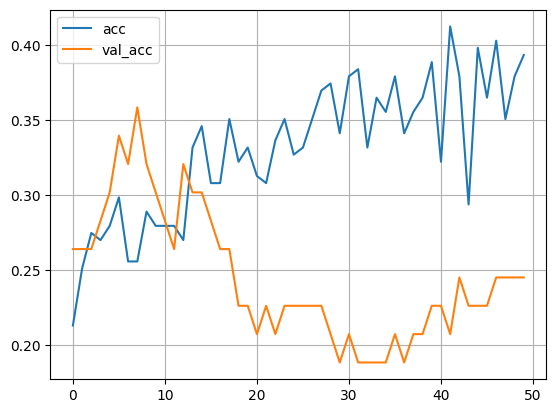

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2573 - loss: 1.5174
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9884171726042918
r2_score in Simulation Failt  void  for Each Blade :  0.9759600732555263
Error in Simulation Fault for Each Blade :  1.8450134639115738  --- r2_score Fault S ----  0.9666156841272076
Error in Simulation Fault T  for Each Blade :  1.8450134639115738  --- r2_score Fault T :  0.9536835522986002
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9615362372818849
r2_score in Simulation Failt  void  for Each Blade :  0.9793441278849253
Error in Simulation Fault for Each Blade :  -0.598461526266969  --- r2_score Fault S ----  0.9851285190175931
Error in Simulation Fault T  for Each Blade :  -0.598461526266969  --- r2_score Fault T :  0.9707600406335506
 ----- for each Blade Simulated ----- 
r2_sco

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.24528301886792453
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - acc: 0.1978 - loss: 1.5017 - val_acc: 0.3208 - val_loss: 1.4207
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2742 - loss: 1.4604 - val_acc: 0.3208 - val_loss: 1.4152
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2733 - loss: 1.4313 - val_acc: 0.3396 - val_loss: 1.4085
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2381 - loss: 1.4421 - val_acc: 0.3208 - val_loss: 1.4036
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2815 - loss: 1.4436 - val_acc: 0.3208 - val_loss: 1.3995
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2632 - loss: 1.4201 - val_acc: 0.3208 - val_loss: 1.3965
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2387 - loss: 1.4081 - val_acc: 0.3019 - val_loss: 1.3941
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2402 - loss: 1.3934 - val_acc: 0.3019 - val_loss: 1.3929
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2189 - loss: 1.4046 - val_acc: 0.301

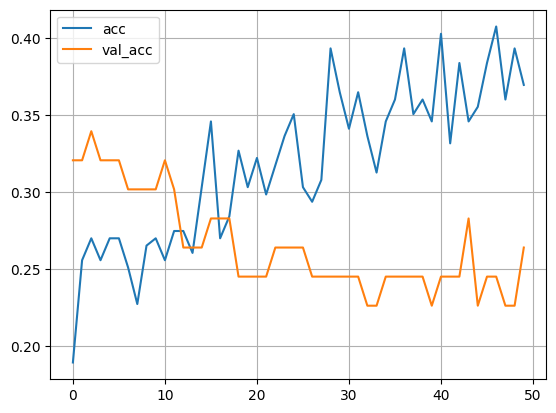

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2699 - loss: 1.4027 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9916680570518808
r2_score in Simulation Failt  void  for Each Blade :  0.9900362862186407
Error in Simulation Fault for Each Blade :  -0.14827704646334006  --- r2_score Fault S ----  0.9859127108717427
Error in Simulation Fault T  for Each Blade :  -0.14827704646334006  --- r2_score Fault T :  0.9860903676644555
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9913612221798924
r2_score in Simulation Failt  void  for Each Blade :  0.9701746444040817
Error in Simulation Fault for Each Blade :  0.8473461697367375  --- r2_score Fault S ----  0.9783498548626481
Error in Simulation Fault T  for Each Blade :  0.8473461697367375  --- r2_score Fault T :  0.9913722528724577
 ----- for each Blade Simulated ----- 
r2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.24528301886792453
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - acc: 0.2264 - loss: 1.5195 - val_acc: 0.3019 - val_loss: 1.3665
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2243 - loss: 1.4552 - val_acc: 0.3208 - val_loss: 1.3586
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2454 - loss: 1.4417 - val_acc: 0.3208 - val_loss: 1.3534
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2177 - loss: 1.4511 - val_acc: 0.3396 - val_loss: 1.3507
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2248 - loss: 1.4248 - val_acc: 0.3585 - val_loss: 1.3498
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3162 - loss: 1.4044 - val_acc: 0.3585 - val_loss: 1.3506
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2434 - loss: 1.4286 - val_acc: 0.3396 - val_loss: 1.3524
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2513 - loss: 1.4074 - val_acc: 0.3396 - val_loss: 1.3545
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2301 - loss: 1.4118 - val_acc: 0.3396

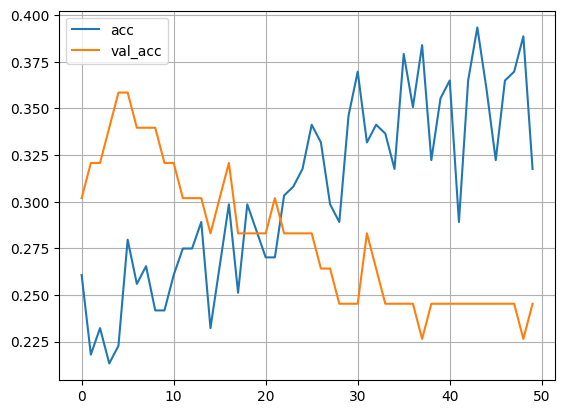

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2469 - loss: 1.4136 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9438638448769672
r2_score in Simulation Failt  void  for Each Blade :  0.9798180894354324
Error in Simulation Fault for Each Blade :  -0.744310644429607  --- r2_score Fault S ----  0.9844023599966031
Error in Simulation Fault T  for Each Blade :  -0.744310644429607  --- r2_score Fault T :  0.9904560851388136
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9443632842261942
r2_score in Simulation Failt  void  for Each Blade :  0.9808854112454471
Error in Simulation Fault for Each Blade :  -0.6083715364357616  --- r2_score Fault S ----  0.9888236737610142
Error in Simulation Fault T  for Each Blade :  -0.6083715364357616  --- r2_score Fault T :  0.990678579190735
 ----- for each Blade Simulated ----- 
r2_sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.24528301886792453
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.1815 - loss: 1.4732 - val_acc: 0.1698 - val_loss: 1.4388
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2404 - loss: 1.5040 - val_acc: 0.1698 - val_loss: 1.4254
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3166 - loss: 1.4045 - val_acc: 0.1698 - val_loss: 1.4154
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2678 - loss: 1.4350 - val_acc: 0.1887 - val_loss: 1.4075
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2581 - loss: 1.4284 - val_acc: 0.2264 - val_loss: 1.4008
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2330 - loss: 1.4118 - val_acc: 0.1887 - val_loss: 1.3964
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3088 - loss: 1.3932 - val_acc: 0.1887 - val_loss: 1.3923
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2555 - loss: 1.4033 - val_acc: 0.1887 - val_loss: 1.3902
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2731 - loss: 1.4026 - val_acc: 0.22

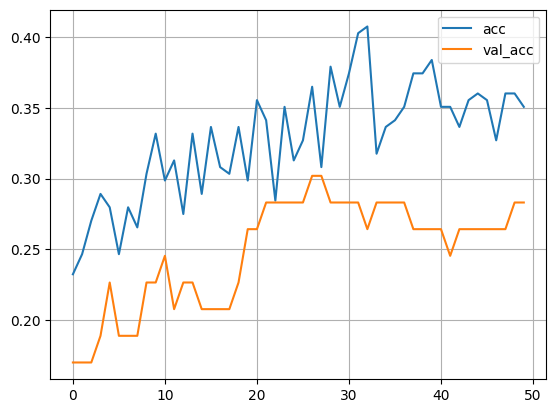

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2720 - loss: 1.3615 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9744238248760326
r2_score in Simulation Failt  void  for Each Blade :  0.9858482285084975
Error in Simulation Fault for Each Blade :  0.21486698670040294  --- r2_score Fault S ----  0.9747251137867358
Error in Simulation Fault T  for Each Blade :  0.21486698670040294  --- r2_score Fault T :  0.9806145117974252
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9838453749234729
r2_score in Simulation Failt  void  for Each Blade :  0.9836776849995142
Error in Simulation Fault for Each Blade :  0.48344575331938255  --- r2_score Fault S ----  0.9868194315445561
Error in Simulation Fault T  for Each Blade :  0.48344575331938255  --- r2_score Fault T :  0.9761547040180328
 ----- for each Blade Simulated ----- 
r2

In [ ]:
for iter_alpha in total_alpha_content :
  for iter_flat in total_flat_content :
    print(f"iter_alpha : {iter_alpha} | iter_flat : {iter_flat} ")
    params_health   = []
    params_fault    = []
    params_fault_t  = []
    params_health_t = []
    for iter_link in total_file_link :
      df_table_change     = pd.read_csv(iter_link)
      for locate in total_location:
        related_x = -1
        related_y = -1
        related_z = -1
        for iteration in range(2):
          alpha = 0
          term  = 0
          Flat_Add = 0
          noise_activate = ( (np.random.randn() + 1 ) / 100 )
          #print( f'Alpha : {iter_alpha} ' ,  f'Table Change : {iter_link}' , ' -- ' , f'Locate : {locate} ' , ' -- ' , f"Iter : {iteration}" , ' -- ' , '')
          select_location_combin_flap_term = 0
          select_locatiom_flap = 0

          total_health_iter  = []
          total_health_iter_t = []
          total_fault_iter   = []
          total_fault_t_iter = []
          new_data_simulated_ = []
          new_data_simulated_fault = []
          new_data_simulated_fault_t = []
          new_data_simulated_health_t = []



          for i in range(df_table_change.shape[0]):
            x_mean = df_table_change.iloc[i, 1]
            x_std  = df_table_change.iloc[i, 2]
            y_mean = df_table_change.iloc[i, 3]
            y_std  = df_table_change.iloc[i, 4]
            z_mean = df_table_change.iloc[i, 5]
            z_std  = df_table_change.iloc[i, 6]

            if i > locate :
              alpha = iter_alpha
              term  = -1 * ( alpha * abs( i - locate ) + noise_activate )
              Flat_Add  = iter_flat / 10

            for element in total_points[i * 3: (i + 1) * 3, :]:
              x_sample = element[0]
              y_sample = element[1]
              z_sample = element[2]
              rng = np.random.default_rng()
              x_added  = rng.normal(x_mean, x_std, size=1)
              x_added  = x_added.tolist()[0]
              x_sample += related_x * x_added

              y_added  = rng.normal(y_mean, y_std, size=1)
              y_added  = y_added.tolist()[0]
              y_sample += related_y * y_added

              z_added  = rng.normal(z_mean, z_std, size=1)
              z_base   = z_sample

              z_added_term  = z_added.tolist()[0] + term
              z_added       = z_added.tolist()[0]
              z_sample_new_term = z_base + related_z * z_added_term
              z_sample_new      = z_base + related_z * z_added
              z_flat  = z_sample_new_term
              z_flap_health = z_sample_new


              if select_location_combin_flap_term  == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flat = z_sample_new_term + Flat_Add


              if select_locatiom_flap == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flap_health = z_sample_new + Flat_Add







              new_data_simulated_.append([ x_sample, y_sample, z_sample_new  ])
              new_data_simulated_fault.append([ x_sample, y_sample, z_sample_new_term  ])
              new_data_simulated_fault_t.append([ x_sample, y_sample, z_flat  ])
              new_data_simulated_health_t.append([x_sample , y_sample , z_flap_health ])

              total_health_iter.append([ x_sample, y_sample, z_sample_new  ])
              total_fault_iter.append([ x_sample, y_sample, z_sample_new_term  ])
              total_fault_t_iter.append([ x_sample, y_sample, z_flat  ])
              total_health_iter_t.append([x_sample , y_sample , z_flap_health ])



          # fig = plt.figure(figsize=(20 , 10 ))

          # ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )
          # ax1 = fig.add_subplot(1 , 6 , 2 , projection='3d' )
          # ax2 = fig.add_subplot(1 , 6 , 3 , projection='3d' )
          # ax3 = fig.add_subplot(1 , 6 , 4 , projection='3d' )
          # ax4 = fig.add_subplot(1 , 6 , 5 , projection='3d' )
          # ax5 = fig.add_subplot(1 , 6 , 6 , projection='3d' )

          # ax6 = fig.add_subplot(3 , 6 , 1 )
          # ax7 = fig.add_subplot(3 , 6 , 2 )
          # ax8 = fig.add_subplot(3 , 6 , 3 )

          # # ax3 = fig.add_subplot(1 , 6 , 4 )
          # # ax4 = fig.add_subplot(1 , 6 , 5 )
          # # ax5 = fig.add_subplot(1 , 6 , 6 )






          # total_health_iter = np.array(total_health_iter)
          # total_health_iter = np.array(total_health_iter)
          # total_fault_iter = np.array(total_fault_iter)
          # total_fault_t_iter = np.array(total_fault_t_iter)
          # total_health_iter_t = np.array(total_health_iter_t)
          # print(f"iter_alpha : {iter_alpha} , flap: {iter_flat} , locate : {locate} ,  iteration : {iteration} ")

          # ax0.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ] , total_health_iter[: , 2 ]  , label='health' , c = 'r'   )
          # ax0.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  , label='fault_alpha' ,  c = 'b' )
          # ax1.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='blue', s = 30     )
          # ax1.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red' , s = 30 )
          # ax2.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red'  , s = 30  )

          # ax3.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='fault_void' , c ='blue'  )
          # ax3.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1]  , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='red' )
          # ax3.set_xlabel("axis x ")
          # ax3.set_ylabel("axis y ")

          # ax4.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='health' , c ='blue',  )
          # ax4.scatter3D(total_fault_t_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha+ void ' , c='red' ,  )
          # ax4.set_xlabel("axis x")
          # ax4.set_ylabel("axis y")

          # ax5.scatter3D(total_health_iter[: , 0 ]  , total_health_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='health' , c ='blue' ,  )
          # ax5.scatter3D(total_health_iter_t[: , 0 ] , total_health_iter_t[: , 1] , total_fault_t_iter[: , 2 ]  , label='fault_void' , c='red' ,  )
          # ax5.set_xlabel("axis x ")
          # ax5.set_ylabel("axis y ")

          # ax6.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 ,  )
          # ax6.scatter(total_health_iter_t[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_void' , c='r' , s = 30 ,  )
          # ax6.set_xlabel("axis  x ")
          # ax6.set_ylabel("axis  y ")
          # ax6.set_title(f"alpha : {iter_alpha} , void : {iter_flat/10} , location : {locate}")

          # ax7.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 , alpha = 0.5 )
          # ax7.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='r' , s = 30  )
          # ax7.set_xlabel("axis  x ")
          # ax7.set_ylabel("axis  y ")

          # ax8.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_alpha' , c='b' , )
          # ax8.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='Fault_alpha + void' , c='r')
          # ax8.set_xlabel("axis  x ")
          # ax8.set_ylabel("axis  y ")


          # ax0.legend()
          # ax0.grid()
          # ax0
          # ax1.legend()
          # ax1.grid()
          # ax2.legend()
          # ax2.grid()
          # ax3.legend()
          # ax3.grid()

          # ax4.legend()
          # ax4.grid()
          # ax5.legend()
          # ax5.grid()


          # ax6.legend()
          # ax6.grid()

          # ax7.legend()
          # ax7.grid()
          # ax8.legend()
          # ax8.grid()

          # plt.show()




          new_data_simulated_         = np.array(new_data_simulated_)
          new_data_simulated_fault    = np.array(new_data_simulated_fault)
          new_data_simulated_fault_t  = np.array(new_data_simulated_fault_t)
          new_data_simulated_health_t = np.array(new_data_simulated_health_t)


          #fig = plt.figure(figsize=(30, 10))
          df_health = pd.DataFrame()
          df_health['X_'] = new_data_simulated_[:, 0]
          df_health['Y_'] = new_data_simulated_[:, 1]
          df_health['Z_'] = new_data_simulated_[:, 2]

          poly = PolynomialFeatures(degree=2)
          x_poly = poly.fit_transform(df_health[['X_', 'Y_']])
          scaler = StandardScaler()
          df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander['Z_'] = df_health['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model = LinearRegression()
          model.fit(x_train, z_train)
          z_predict = model.predict(x_test)
          intercept_0 = model.intercept_
          coef1 = model.coef_[0]
          coef2 = model.coef_[1]
          coef3 = model.coef_[2]
          coef4 = model.coef_[3]
          coef5 = model.coef_[4]
          coef6 = model.coef_[5]

          total_new_generate = []
          total_error_health = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander.iloc[i, 0] + coef2 * df_stander.iloc[i, 1] + coef3 * df_stander.iloc[i, 2] + coef4 * df_stander.iloc[i, 3] + coef5 * df_stander.iloc[i, 4]
            + coef6 * df_stander.iloc[i, 5]
            total_new_generate.append(new_value)
            error = df_stander.iloc[i, -1] - new_value
            total_error_health += error

          print("r2_score in Simulation Health for Each Blade : " , r2_score(z_predict, z_test) )

          #class health == 0
          params_health.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict, z_test),locate , 0 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class health t ----

          df_health_t = pd.DataFrame()
          df_health_t['X_'] = new_data_simulated_health_t[:, 0]
          df_health_t['Y_'] = new_data_simulated_health_t[:, 1]
          df_health_t['Z_'] = new_data_simulated_health_t[:, 2]

          poly_health_t = PolynomialFeatures(degree=2)
          x_poly_health_t = poly_health_t.fit_transform(df_health_t[['X_', 'Y_']])
          scaler_health_t = StandardScaler()
          df_stander_health_t = pd.DataFrame(scaler_health_t.fit_transform(x_poly_health_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_health_t['Z_'] = df_health_t['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander_health_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model_health_t = LinearRegression()
          model_health_t.fit(x_train, z_train)
          z_predict_health_t = model_health_t.predict(x_test)
          intercept_0 = model_health_t.intercept_
          coef1 = model_health_t.coef_[0]
          coef2 = model_health_t.coef_[1]
          coef3 = model_health_t.coef_[2]
          coef4 = model_health_t.coef_[3]
          coef5 = model_health_t.coef_[4]
          coef6 = model_health_t.coef_[5]

          total_new_generate_health_t = []
          total_error_health_t = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander_health_t.iloc[i, 0] + coef2 * df_stander_health_t.iloc[i, 1] + coef3 * df_stander_health_t.iloc[i, 2] + coef4 * df_stander_health_t.iloc[i, 3] + coef5 * df_stander_health_t.iloc[i, 4]
            + coef6 * df_stander_health_t.iloc[i, 5]
            total_new_generate_health_t.append(new_value)
            error = df_stander_health_t.iloc[i, -1] - new_value
            total_error_health_t += error

          print("r2_score in Simulation Failt  void  for Each Blade : " , r2_score(z_predict_health_t, z_test) )

          #class health == 0
          params_health_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_health_t, z_test),locate , 1 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]





          # ---- setup for class Fault ----
          df_fault = pd.DataFrame()
          df_fault['X_'] = new_data_simulated_fault[:, 0]
          df_fault['Y_'] = new_data_simulated_fault[:, 1]
          df_fault['Z_'] = new_data_simulated_fault[:, 2]




          poly_fault = PolynomialFeatures(degree=2)
          x_poly_fault = poly_fault.fit_transform(df_fault[['X_', 'Y_']])
          scaler_fault = StandardScaler()
          df_stander_fault = pd.DataFrame(scaler_fault.fit_transform(x_poly_fault), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault['Z_'] = df_fault['Z_']
          x_train_fault , x_test_fault , z_train_fault , z_test_fault = train_test_split(df_stander_fault[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault = LinearRegression()
          model_fault.fit(x_train_fault, z_train_fault)
          z_predict_fault = model_fault.predict(x_test_fault)
          intercept_0 = model_fault.intercept_
          coef1 = model_fault.coef_[0]
          coef2 = model_fault.coef_[1]
          coef3 = model_fault.coef_[2]
          coef4 = model_fault.coef_[3]
          coef5 = model_fault.coef_[4]
          coef6 = model_fault.coef_[5]
          total_new_generate_fault = []
          total_error_fault = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault.iloc[i, 0] + coef2 * df_stander_fault.iloc[i, 1] + coef3 *  df_stander_fault.iloc[i, 2] + coef4 * df_stander_fault.iloc[i, 3] + coef5 * df_stander_fault.iloc[i, 4]  + coef6 * df_stander_fault.iloc[i, 5]
            total_new_generate_fault.append(new_value)
            error_Fault = df_stander_fault.iloc[i, -1] - new_value
            total_error_fault += error_Fault

          print("Error in Simulation Fault for Each Blade : " , total_error_fault  , " --- r2_score Fault S ---- " ,  r2_score(z_predict_fault, z_test_fault))


          params_fault.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault, z_test_fault),locate ,  2 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class Fault T ----

          df_fault_t = pd.DataFrame()
          df_fault_t['X_'] = new_data_simulated_fault_t[:, 0]
          df_fault_t['Y_'] = new_data_simulated_fault_t[:, 1]
          df_fault_t['Z_'] = new_data_simulated_fault_t[:, 2]




          poly_fault_t = PolynomialFeatures(degree=2)
          x_poly_fault_t = poly_fault_t.fit_transform(df_fault_t[['X_', 'Y_']])
          scaler_fault_t = StandardScaler()
          df_stander_fault_t = pd.DataFrame(scaler_fault_t.fit_transform(x_poly_fault_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault_t['Z_'] = df_fault_t['Z_']
          x_train_fault_t , x_test_fault_t , z_train_fault_t , z_test_fault_t = train_test_split(df_stander_fault_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault_t = LinearRegression()
          model_fault_t.fit(x_train_fault_t, z_train_fault_t)
          z_predict_fault_t = model_fault_t.predict(x_test_fault_t)
          intercept_0 = model_fault_t.intercept_
          coef1 = model_fault_t.coef_[0]
          coef2 = model_fault_t.coef_[1]
          coef3 = model_fault_t.coef_[2]
          coef4 = model_fault_t.coef_[3]
          coef5 = model_fault_t.coef_[4]
          coef6 = model_fault_t.coef_[5]
          total_new_generate_fault_t = []
          total_error_fault_t = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault_t.iloc[i, 0] + coef2 * df_stander_fault_t.iloc[i, 1] + coef3 *  df_stander_fault_t.iloc[i, 2] + coef4 * df_stander_fault_t.iloc[i, 3] + coef5 * df_stander_fault_t.iloc[i, 4]  + coef6 * df_stander_fault_t.iloc[i, 5]
            total_new_generate_fault_t.append(new_value)
            error_Fault = df_stander_fault_t.iloc[i, -1] - new_value
            total_error_fault_t += error_Fault

          print("Error in Simulation Fault T  for Each Blade : " , total_error_fault , " --- r2_score Fault T : " ,  r2_score(z_predict_fault_t, z_test_fault_t)   )



          params_fault_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault_t, z_test_fault_t),locate ,  3 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          print(" ----- for each Blade Simulated ----- " )



#----
    params_health = np.array(params_health)
    df_params = pd.DataFrame({'bias':params_health[: , 0 ] , 'betha_0':params_health[ : , 1 ] , 'betha_1':params_health[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health[ : , 7 ]  ,
                          'locate' : params_health[: , 8 ].astype(int)   , 'class' :params_health[: , 9 ] ,
                              'alpha' :params_health[: , 10 ] , 'flap' : params_health[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_bias'].append(df_params['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_bias'].append(df_params['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_0'].append(df_params['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_0'].append(df_params['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_1'].append(df_params['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_1'].append(df_params['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_2'].append(df_params['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_2'].append(df_params['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_3'].append(df_params['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_3'].append(df_params['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_4'].append(df_params['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_4'].append(df_params['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_5'].append(df_params['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_5'].append(df_params['betha_5'].std())

    # -------------------------------------------------------------------------------------------

    params_health_t = np.array(params_health_t)
    df_params_health_t = pd.DataFrame({'bias':params_health_t[: , 0 ] , 'betha_0':params_health_t[ : , 1 ] , 'betha_1':params_health_t[ : , 2 ] , 'betha_2':params_health_t[ : , 3 ] ,  'betha_3':params_health_t[ : , 4 ] , 'betha_4':params_health_t[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health_t[ : , 7 ]  ,
                          'locate' : params_health_t[: , 8 ].astype(int)   , 'class' :params_health_t[: , 9 ] ,
                              'alpha' :params_health_t[: , 10 ] , 'flap' : params_health_t[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_bias'].append(df_params_health_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_bias'].append(df_params_health_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_0'].append(df_params_health_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_0'].append(df_params_health_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_1'].append(df_params_health_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_1'].append(df_params_health_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_2'].append(df_params_health_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_2'].append(df_params_health_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_3'].append(df_params_health_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_3'].append(df_params_health_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_4'].append(df_params_health_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_4'].append(df_params_health_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_5'].append(df_params_health_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_5'].append(df_params_health_t['betha_5'].std())





    # --------------------------------------------------------------------------------------------
    params_fault = np.array(params_fault)
    df_params_fault = pd.DataFrame({'bias':params_fault[: , 0 ] , 'betha_0':params_fault[ : , 1 ] , 'betha_1':params_fault[ : , 2 ] , 'betha_2':params_fault[ : , 3 ] ,  'betha_3':params_fault[ : , 4 ] , 'betha_4':params_fault[ : , 5 ] , 'betha_5':params_fault[ : , 6 ] , 'R2' : params_fault[ : , 7 ]  ,
                            'locate' : params_fault[: , 8 ].astype(int) ,
                                    'class' :params_fault[: , 9 ]  ,
                                    'alpha' :params_fault[: , 10 ] , 'flap' : params_fault[: , 11 ] }   )


    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_bias'].append(df_params_fault['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_bias'].append(df_params_fault['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_0'].append(df_params_fault['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_0'].append(df_params_fault['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_1'].append(df_params_fault['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_1'].append(df_params_fault['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_2'].append(df_params_fault['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_2'].append(df_params_fault['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_3'].append(df_params_fault['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_3'].append(df_params_fault['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_4'].append(df_params_fault['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_4'].append(df_params_fault['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_5'].append(df_params_fault['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_5'].append(df_params_fault['betha_5'].std())




    params_fault_t = np.array(params_fault_t)
    df_params_fault_t = pd.DataFrame({'bias':params_fault_t[: , 0 ] , 'betha_0':params_fault_t[ : , 1 ] , 'betha_1':params_fault_t[ : , 2 ] , 'betha_2':params_fault_t[ : , 3 ] ,  'betha_3':params_fault_t[ : , 4 ] , 'betha_4':params_fault_t[ : , 5 ] , 'betha_5':params_fault_t[ : , 6 ] , 'R2' : params_fault_t[ : , 7 ]  ,
                            'locate' : params_fault_t[: , 8 ].astype(int) ,
                                    'class' :params_fault_t[: , 9 ]  ,
                                    'alpha' :params_fault_t[: , 10 ] , 'flap' : params_fault_t[: , 11 ] }  )


    # check_columns = ['bias' , 'betha_0' , 'betha_1' , 'betha_2' , 'betha_3' , 'betha_4' , 'betha_5' ]
    # for element in check_columns :
    #   fig = plt.figure(figsize = (10 , 10 ))
    #   ax0 = fig.add_subplot(111 )
    #   sns.kdeplot( df_params[element]  , label=f'mean_health - {element} coef'  , shade=True )
    #   sns.kdeplot(df_params_fault[element] , label=f'mean_fault_alpha - {element} coef '  , shade=True  )
    #   sns.kdeplot(df_params_fault_t[element] , label=f'mean_fault-alpha + void- {element} coef ' ,  shade=True  )
    #   sns.kdeplot(df_params_health_t[element] , label=f'mean_fault-void- {element} coef ' ,  shade=True  )
    #   plt.legend()
    #   plt.title(f"For This  alpha : {iter_alpha} and void : {iter_flat / 10 }  ")
    #   plt.grid()
    #   plt.show()



    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_bias'].append(df_params_fault_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_bias'].append(df_params_fault_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_0'].append(df_params_fault_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_0'].append(df_params_fault_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_1'].append(df_params_fault_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_1'].append(df_params_fault_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_2'].append(df_params_fault_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_2'].append(df_params_fault_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_3'].append(df_params_fault_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_3'].append(df_params_fault_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_4'].append(df_params_fault_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_4'].append(df_params_fault_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_5'].append(df_params_fault_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_5'].append(df_params_fault_t['betha_5'].std())



    concat_2_df_health_fault = pd.concat([df_params , df_params_health_t , df_params_fault , df_params_fault_t ] , axis = 0 )
    df_corr = concat_2_df_health_fault.corr()







  # --- learning
    #plt.figure(figsize= (10 , 10 ) )
    #ax = sns.heatmap(df_corr , annot=True )
    #print(df_corr)
    #plt.show()
    total_simulation['alpha'].append(iter_alpha)
    total_simulation['flap'].append(iter_flat)
    total_simulation['bias_correlation'].append(df_corr['class']['bias'])
    total_simulation['betha_0_correlation'].append(df_corr['class']['betha_0'])
    total_simulation['betha_1_correlation'].append(df_corr['class']['betha_1'])
    total_simulation['betha_2_correlation'].append(df_corr['class']['betha_2'])
    total_simulation['betha_3_correlation'].append(df_corr['class']['betha_3'])
    total_simulation['betha_4_correlation'].append(df_corr['class']['betha_4'])
    total_simulation['betha_5_correlation'].append(df_corr['class']['betha_5'])



    #df2_health  =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0 ]
    #df2_fault   =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1 ]
    #df2_fault_t =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 2 ]


    stander_u = StandardScaler()
    stand_df_with_out = concat_2_df_health_fault.drop(['class' , 'alpha' , 'flap'] , axis = 1 )
    stand_df_with_out = pd.DataFrame(stander_u.fit_transform(stand_df_with_out )  , columns = stand_df_with_out.columns )
    x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(stand_df_with_out , concat_2_df_health_fault['class'] , random_state=42 , test_size=0.2  )
    obj_gaunb = GaussianNB()
    obj_gaunb.fit(x_u_train , y_u_train )
    pre_nb = obj_gaunb.predict(x_u_test)
    accuray_nav = accuracy_score(pre_nb ,y_u_test )
    print(f"accuracy Nave Bays : {accuray_nav}")
    total_simulation['accuracy_nav'].append(accuray_nav)


    # ---------------------------------------------------------
    rfc=RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }

    CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
    CV_rfc.fit(x_u_train, y_u_train)
    best_params_for_random_forest = CV_rfc.best_params_
    pre_random = CV_rfc.predict(x_u_test)
    accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
    print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
    total_simulation['accuracy_random_forest'].append(accuracy_random_forest)
    total_simulation['n_estimators_RF'].append(best_params_for_random_forest['n_estimators'])
    total_simulation['max_features_RF'].append(best_params_for_random_forest['max_features'])
    total_simulation['max_depth_RF'].append(best_params_for_random_forest['max_depth'])
    total_simulation['criterion_RF'].append(best_params_for_random_forest['criterion'])


    # ---------------------------------------------------------
    extra_classifier = ExtraTreesClassifier()
    extra_classifier.fit(x_u_train , y_u_train )
    predict_extra = extra_classifier.predict(x_u_test)
    total_simulation['accuracy_extra_classifier'].append(accuracy_score(predict_extra ,y_u_test ) )

    # --------------------------------------------------------
    param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
    grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
    grid.fit(x_u_train, y_u_train)
    best_params_for_svc = grid.best_params_
    model_svc = SVC()
    svc_predict = grid.predict(x_u_test)
    accuracy_svc = accuracy_score(svc_predict ,y_u_test )
    total_simulation['accuracy_svc_'].append(accuracy_svc)
    total_simulation['C_svc'].append(best_params_for_svc['C'])
    total_simulation['kernel_svc'].append(best_params_for_svc['kernel'])
    total_simulation['gamma_svc'].append(best_params_for_svc['gamma'])


    # ----------------------------------------------------------







    new_y_u_train_cat = to_categorical(y_u_train , 4 )
    new_y_u_test_cat  = to_categorical(y_u_test , 4 )

    model_learning = Sequential([
        Dense(32 , activation='relu' , input_shape = x_u_train.shape[1 : ] ) ,
        Dropout(0.2) ,
        Dense(10 , activation= 'relu' ) ,
        Dense(4 , activation='softmax' ) ,
    ])

    model_learning.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['acc' ] )
    model_learning_info = model_learning.fit(x_u_train , new_y_u_train_cat , epochs = 50 , validation_data = [x_u_test , new_y_u_test_cat ] )
    plt.plot(range(50) , model_learning_info.history['acc'] , label='acc' )
    plt.plot(range(50) , model_learning_info.history['val_acc'] , label='val_acc' )
    plt.legend()
    plt.grid()
    plt.show()

    total_simulation['ann'].append(model_learning.evaluate(x_u_test , new_y_u_test_cat)[1])

    print(" ----------------- //////// End This Iter alpha and Flap //////// ------------------------- ")












In [ ]:

df_health_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH)
df_health_t_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T)
df_fault_t_mean_and_std = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T)
df_fault_mean_and_std   = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT)



In [ ]:
check_columns = ['mean_bias' , 'mean_betha_0' , 'mean_betha_1' , 'mean_betha_2' , 'mean_betha_3' , 'mean_betha_4' , 'mean_betha_5' ]


mean fault t :  1.7546052928620217  - mean fault :  1.7544050263031181  - mean health :  1.7454980541575473


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

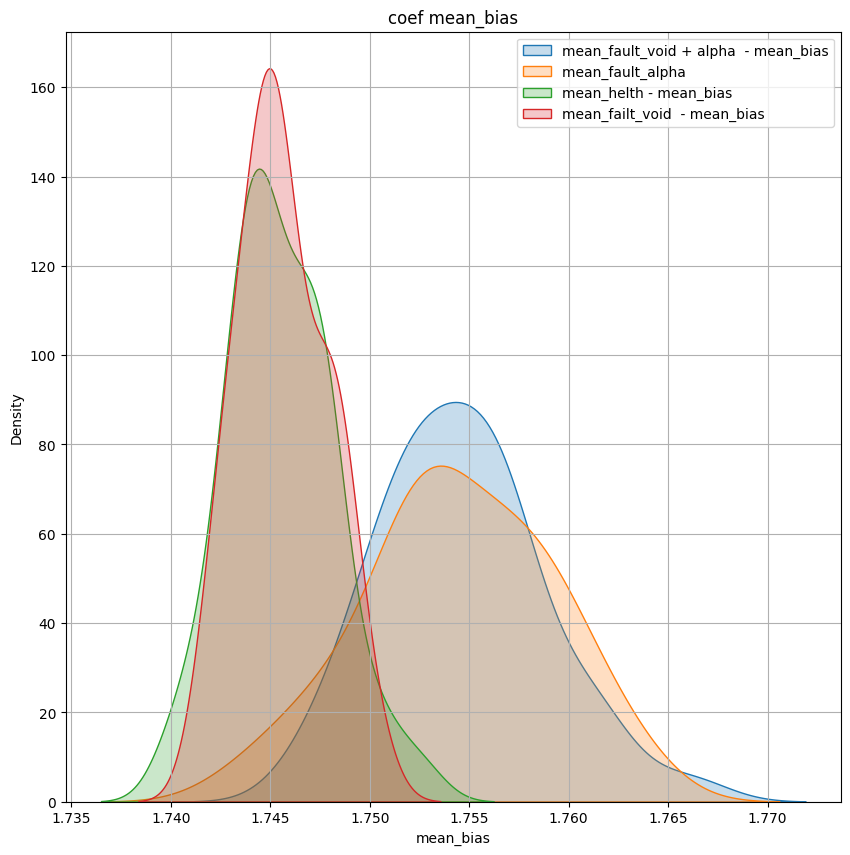

<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning

mean fault t :  0.0  - mean fault :  0.0  - mean health :  0.0


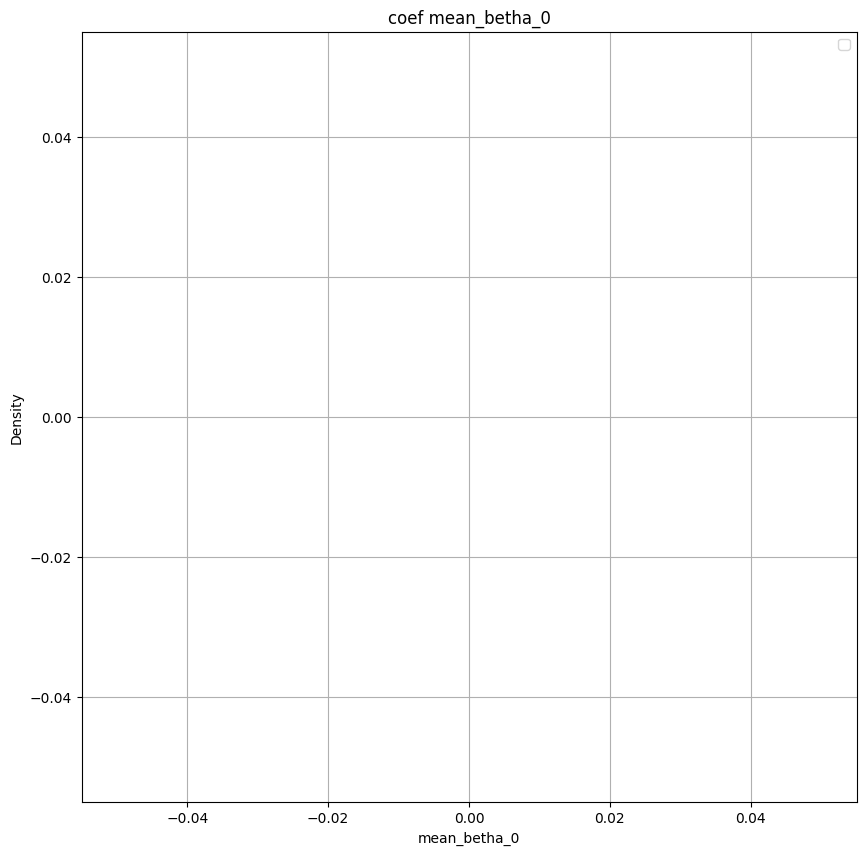

mean fault t :  -1.0640762344137134  - mean fault :  -1.0686536817056702  - mean health :  -1.0509078353161576


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

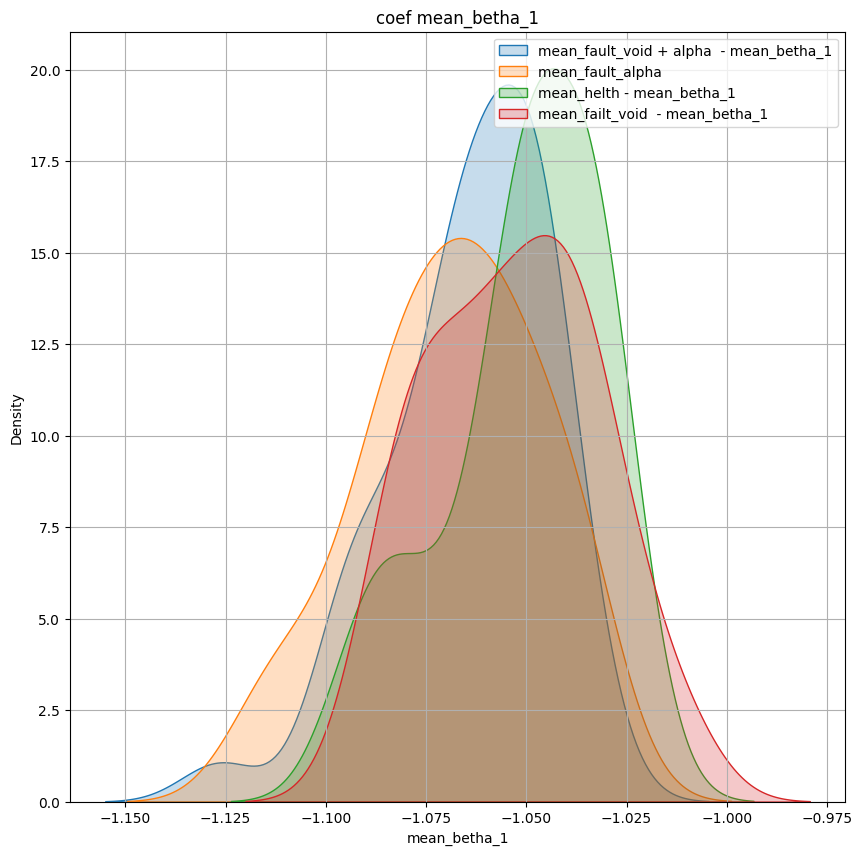

mean fault t :  -0.07203880069689034  - mean fault :  -0.07360263935349838  - mean health :  -0.07226370150004784


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

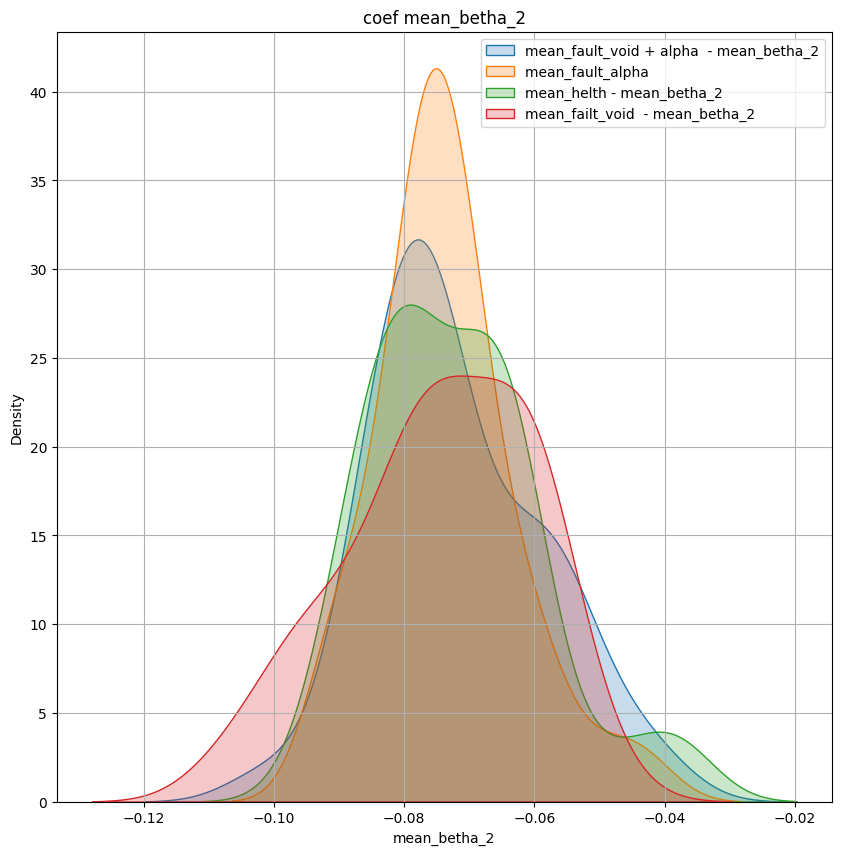

mean fault t :  2.810618827930381  - mean fault :  2.8153107966304325  - mean health :  2.785994105662337


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

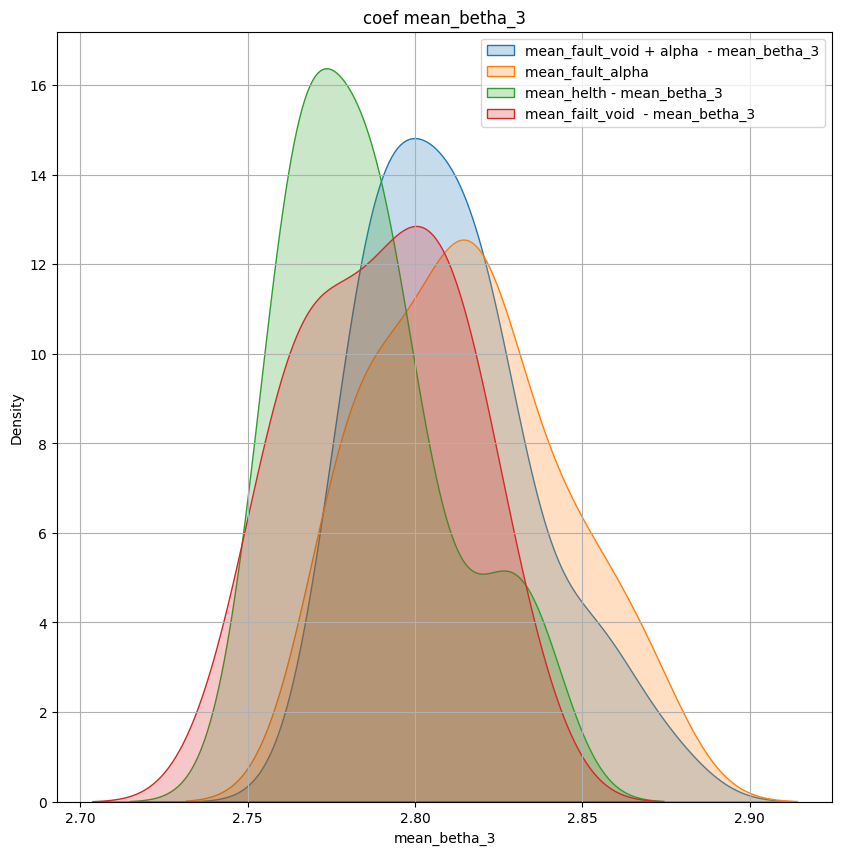

mean fault t :  0.0866360267821434  - mean fault :  0.08747858526527515  - mean health :  0.08517715705213882


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

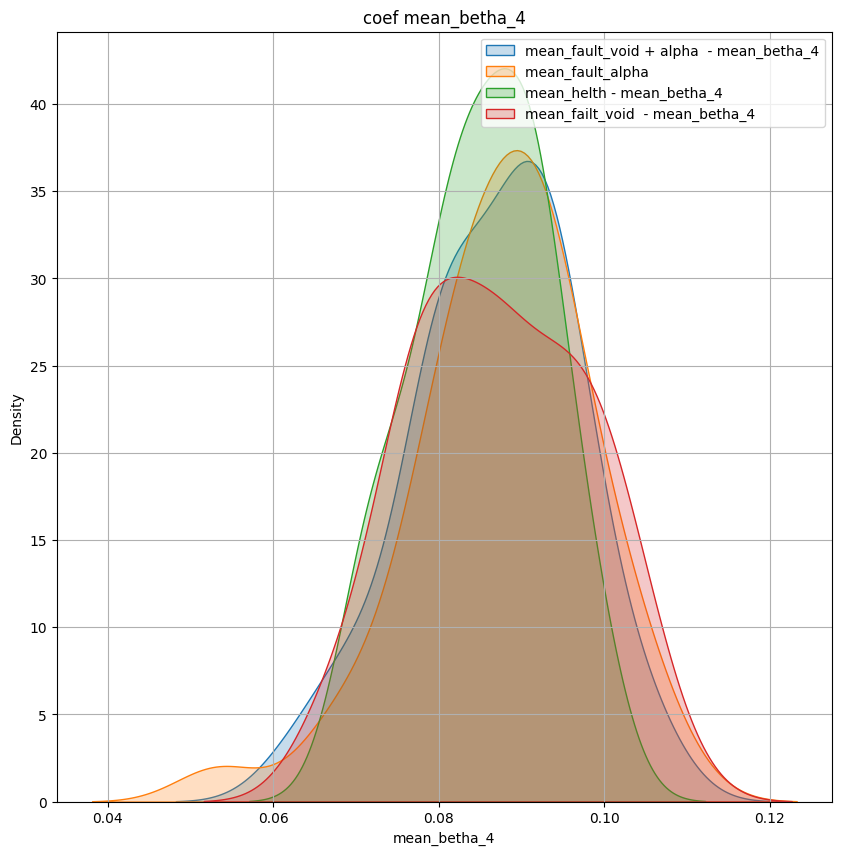

mean fault t :  -0.014559502294770904  - mean fault :  -0.01564184876577133  - mean health :  -0.015899238684106105


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

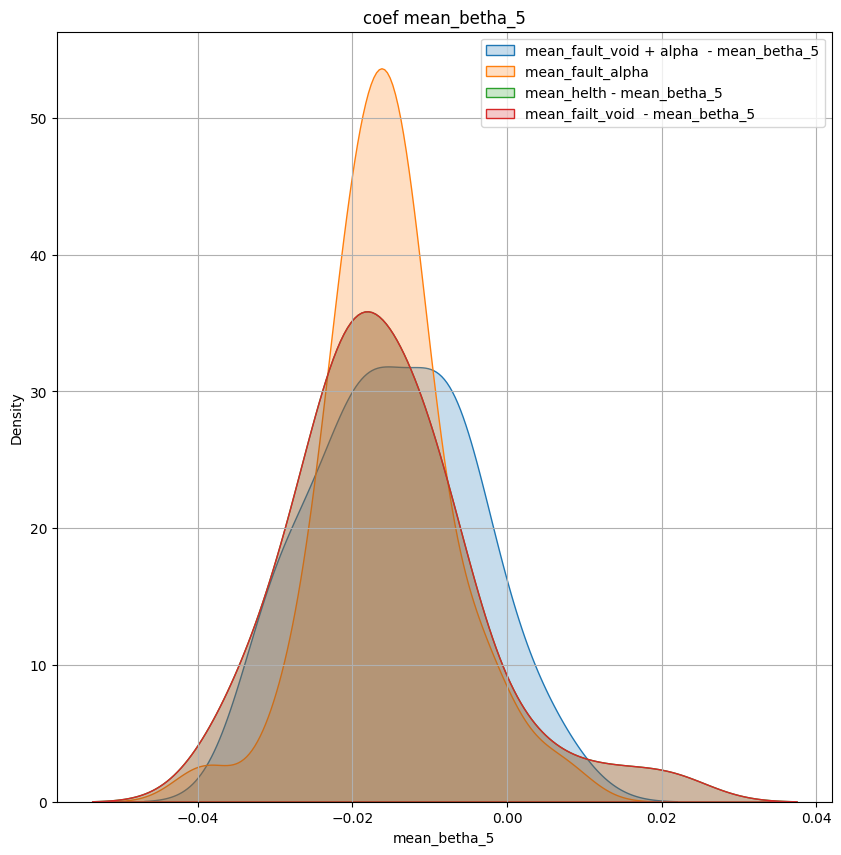

In [ ]:
for element in check_columns :
  fig = plt.figure(figsize = (10 , 10 ))
  ax0 = fig.add_subplot(111 )
  print("mean fault t : " , df_fault_t_mean_and_std[element].mean() , " - mean fault : " , df_fault_mean_and_std[element].mean() , " - mean health : " , df_health_mean_and_std[element].mean() )
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
  sns.kdeplot(df_health_t_mean_and_std[element] , label=f'mean_failt_void  - {element} ' ,  shade=True  )
  plt.legend()
  plt.title(f"coef {element}")
  plt.grid()
  plt.show()

In [ ]:
df_result = pd.DataFrame(total_simulation)


In [ ]:
df_result.head(5)

,bias_correlation,betha_0_correlation,betha_1_correlation,betha_2_correlation,betha_3_correlation,betha_4_correlation,betha_5_correlation,alpha,flap,accuracy_nav,...,n_estimators_RF,max_features_RF,max_depth_RF,criterion_RF,accuracy_extra_classifier,accuracy_svc_,C_svc,kernel_svc,gamma_svc,ann
0,0.012344,NaN,-0.027727,0.053886,0.028491,-0.066947,0.027624,0.000,1,0.4250,...,500,sqrt,4,entropy,0.4000,0.5000,1000,rbf,0.100,0.4250
1,0.004990,NaN,0.013395,0.037267,-0.011674,-0.033304,0.023970,0.000,2,0.4250,...,500,sqrt,4,gini,0.4750,0.4500,1000,rbf,0.001,0.5000
2,0.011378,NaN,-0.044905,-0.022195,0.061262,0.061309,0.013481,0.000,3,0.4500,...,500,sqrt,6,entropy,0.4375,0.4000,1,rbf,0.100,0.4125
3,0.000525,NaN,0.061414,-0.042039,-0.060289,-0.016803,-0.097884,0.000,4,0.4375,...,200,sqrt,5,entropy,0.4375,0.4875,1000,rbf,0.001,0.5125
4,0.015171,NaN,-0.072888,-0.055444,0.088108,0.022110,-0.082908,0.001,1,0.4875,...,500,sqrt,8,gini,0.4500,0.5250,100,rbf,0.100,0.4750


In [ ]:
df_svc_group = df_result.groupby(['alpha' , 'flap' , 'kernel_svc']).agg({'accuracy_svc_' : ['mean'] })

In [ ]:
df_svc_group

accuracy_svc_
                               mean
alpha flap kernel_svc              
0.000 1    rbf               0.5000
      2    rbf               0.4500
      3    rbf               0.4000
      4    rbf               0.4875
0.001 1    rbf               0.5250
      2    rbf               0.5250
      3    linear            0.5125
      4    rbf               0.5125
0.002 1    rbf               0.4750
      2    rbf               0.5875
      3    rbf               0.4875
      4    rbf               0.4875
0.003 1    rbf               0.5125
      2    rbf               0.5750
      3    rbf               0.3625
      4    linear            0.5000
0.004 1    rbf               0.5125
      2    rbf               0.4875
      3    rbf               0.5375
      4    linear            0.4750
0.005 1    rbf               0.3750
      2    linear            0.3875
      3    linear            0.4500
      4    rbf               0.5750
0.006 1    linear            0.4375
      2    rbf               0.4000
      3    rbf               0.4625
      4    rbf               0.4875
0.007 1    rbf               0.4750
      2    rbf               0.5125
      3    linear            0.4000
      4    rbf               0.4500
0.008 1    rbf               0.5125
      2    linear            0.4500
      3    rbf               0.4125
      4    rbf               0.5500
0.009 1    rbf               0.5500
      2    rbf               0.5625
      3    rbf               0.4375
      4    linear            0.4750

In [ ]:
df_svc_group.plot(x = 'alpha' , y = 'accuracy_svc_mean')

KeyError: 'alpha'

IndexError: single positional indexer is out-of-bounds

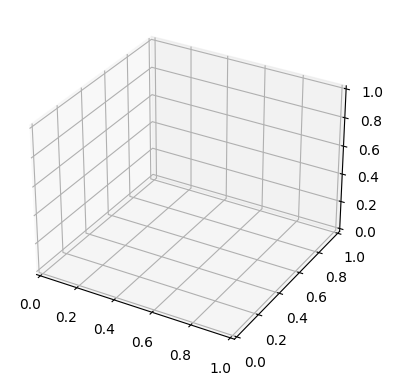

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_svc_group.iloc[: , 0 ] , df_svc_group.iloc[: , 1 ] , df_svc_group[: , 3])
plt.legend()
plt.grid()
plt.show()

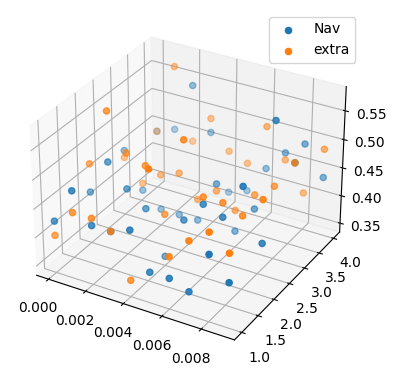

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 9] , label='Nav')
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 15] , label='extra')
plt.legend()
plt.grid()
plt.show()

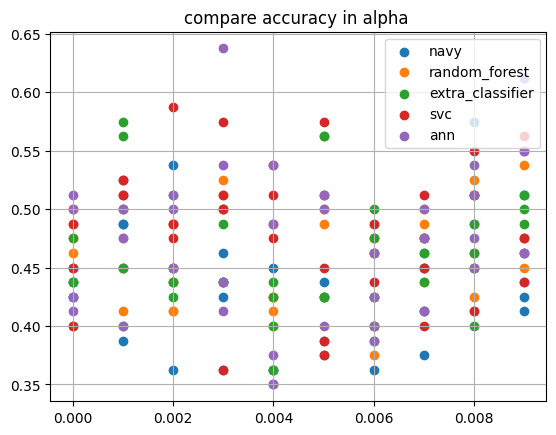

In [ ]:
plt.scatter( df_result['alpha'] , df_result['accuracy_nav'] , label = 'navy')
plt.scatter( df_result['alpha'] , df_result['accuracy_random_forest'] , label = 'random_forest')
plt.scatter( df_result['alpha'] , df_result['accuracy_extra_classifier'] , label = 'extra_classifier')
plt.scatter( df_result['alpha'] , df_result['accuracy_svc_'] , label = 'svc')
plt.scatter( df_result['alpha'] , df_result['ann'] , label = 'ann')
plt.title("compare accuracy in alpha ")
plt.legend()
plt.grid()
plt.show()

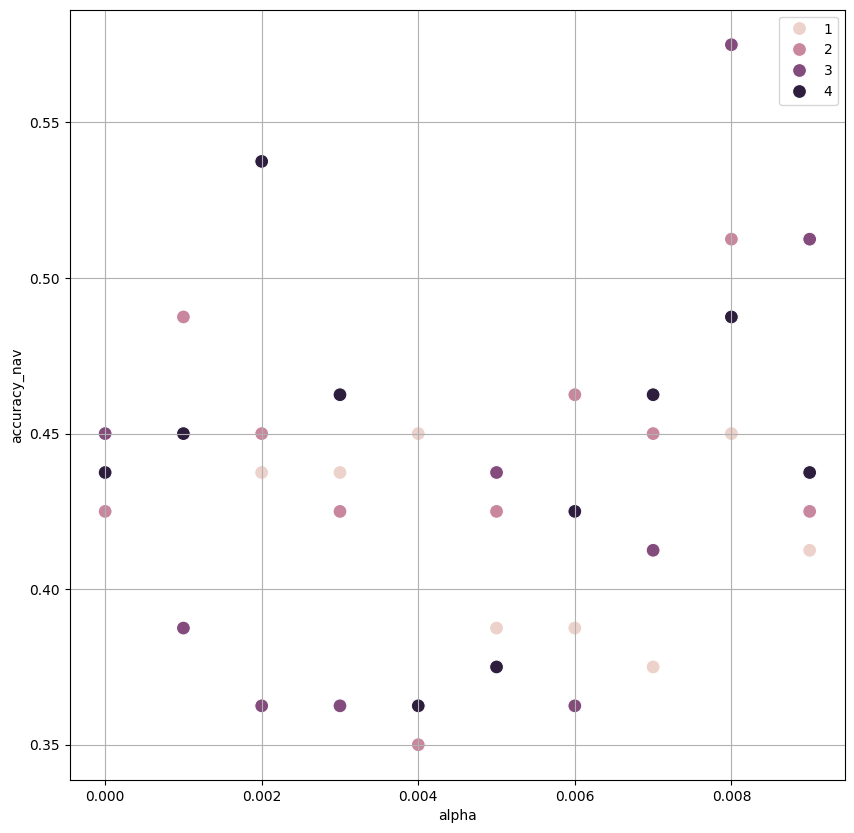

In [ ]:
plt.figure(figsize = (10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="accuracy_nav", hue="flap" , s = 100  )
plt.legend()
plt.grid()
plt.show()

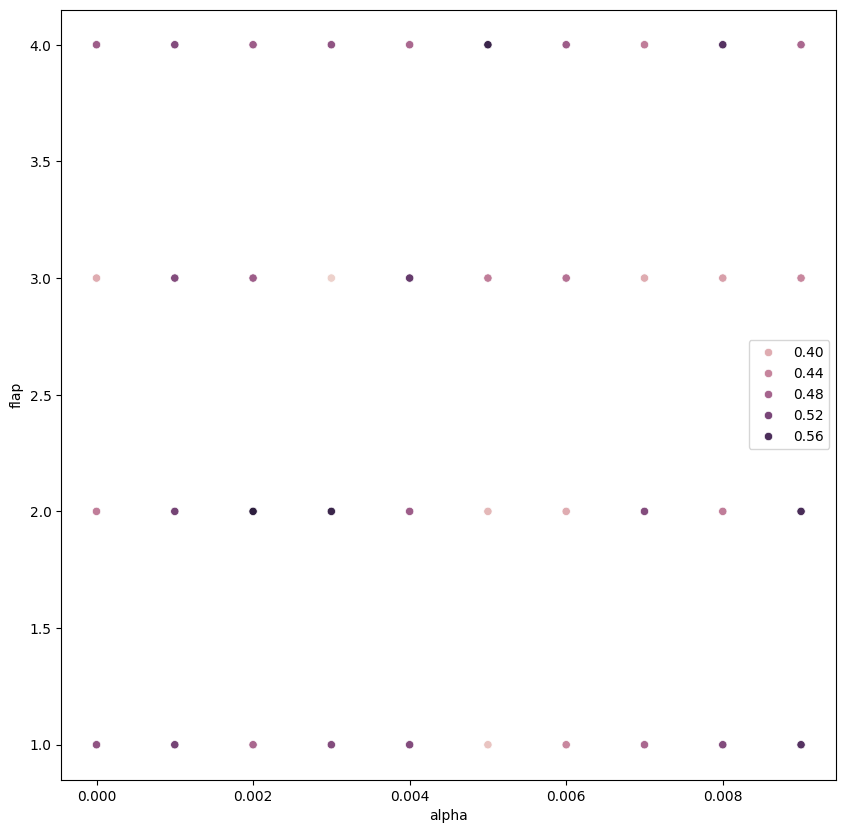

In [ ]:
plt.figure(figsize=(10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="flap", hue="accuracy_svc_", hue_order = ["linear" , "rbf" ] )
plt.legend()
plt.show()

In [ ]:
df_result['flap'].unique()

array([1, 2, 3, 4])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

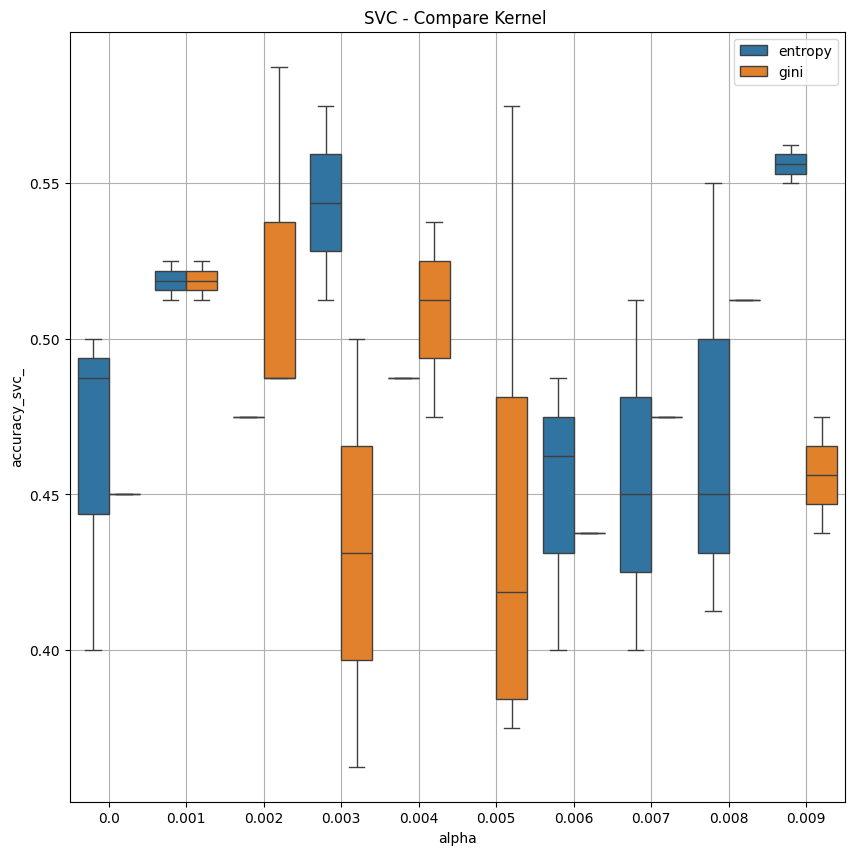

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='criterion_RF', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

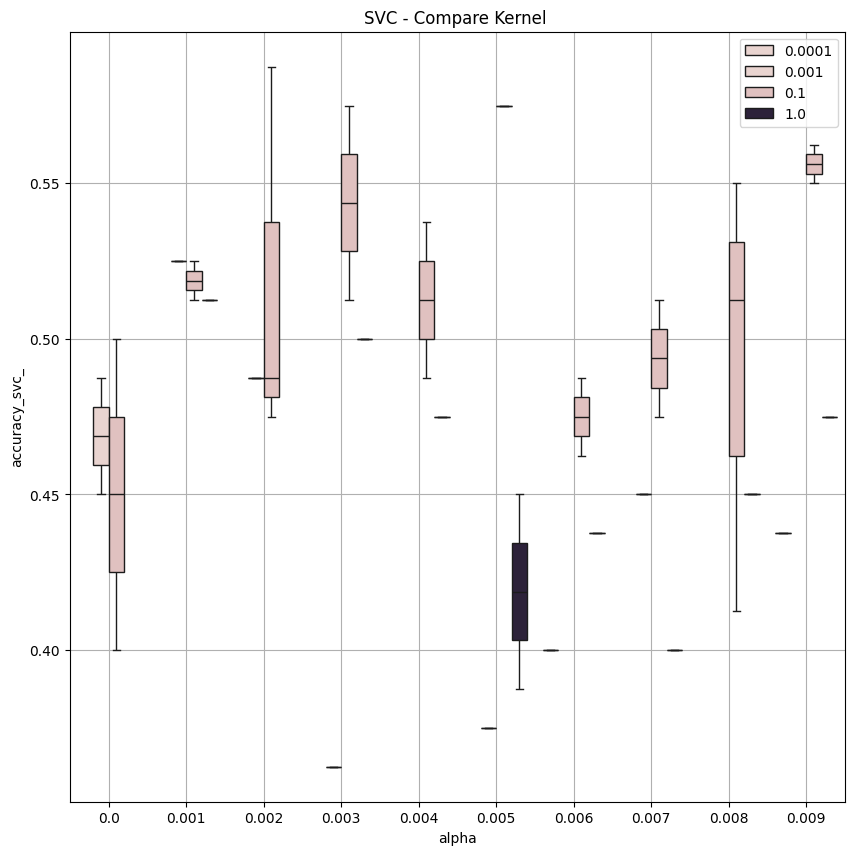

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='gamma_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

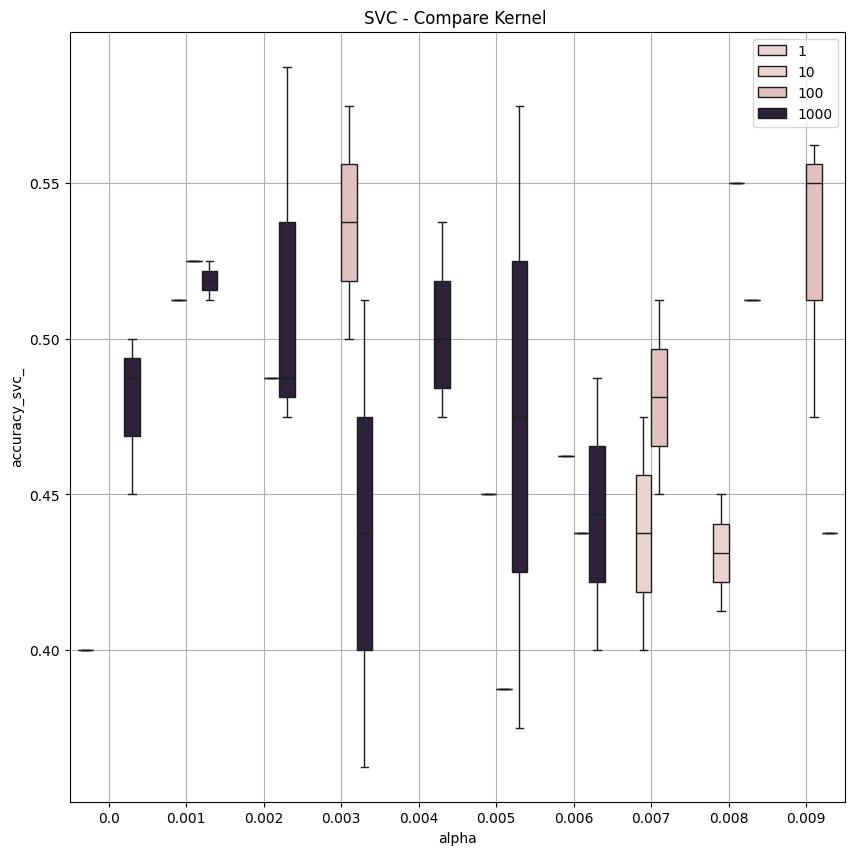

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='C_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


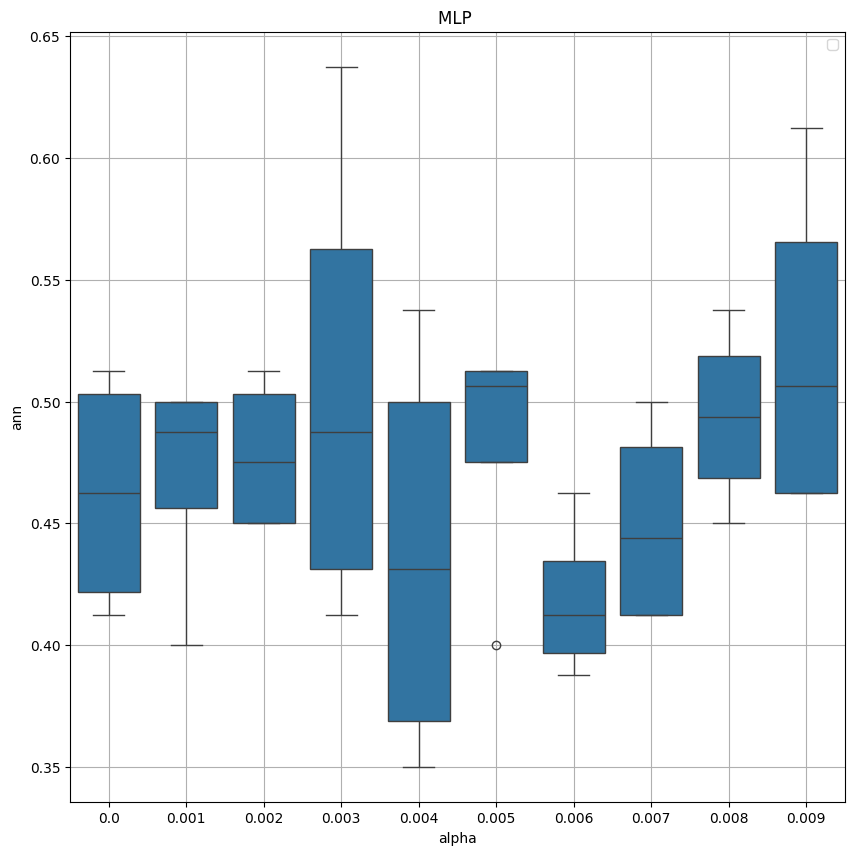

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="ann" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
accuracy_nav

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_nav" , hue="flap" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
